# Generate Clustered Sample using mixture Gaussian

Two functions have been written in this page: generate_2d_sample and generate_3d_sample. They are used to generate mixture of Gaussian binary image used for geo ressearch in 2d image and 3d image respectively.

In your application, only generate_3d_sample should be used since your image shape is 3d like (20, 20, 20). The reason I also wrote 2d version is that 2d version can be visualized fast.

## Library

In [5]:
import pandas as pd
import numpy as np

## Generate 2d image

In [24]:
def generate_2d_sample(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 2))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data
    z = np.zeros((output_side_length,output_side_length))
    for i in range(output_side_length):
        for j in range(output_side_length):
            if (y == [i,j]).all(1).any():
                z[i,j] = 1
    
    return z

In [142]:
def generate_2d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 2))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data
    filtered_y = y[np.all(np.logical_and(y>=0, y<output_side_length), axis=1)]
    filtered_y = filtered_y.astype(int)
    z = np.zeros((output_side_length,output_side_length))
    z[filtered_y[:,0], filtered_y[:,1]] = 1
    return z

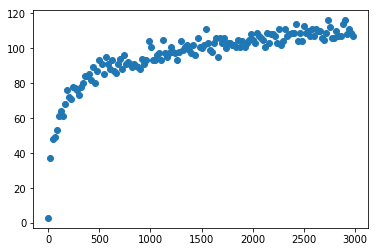

In [148]:
mean_array = [(2, 5), (6, 18), (14, 2)]
num_samples_per_cluster = 50
cov = [[1, 0], [0, 1]]
output_side_length = 20
num_samples_per_cluster_list = []
num_dots_list = []
for num_samples_per_cluster in range(1, 3000, 20):
    z = generate_2d_sample(mean_array, num_samples_per_cluster, cov, output_side_length)
    num_samples_per_cluster_list.append(num_samples_per_cluster)
    num_dots_list.append(np.sum(z))

plt.scatter(num_samples_per_cluster_list, num_dots_list)

### Preview

In [154]:
mean_array = [(2, 5), (6, 18), (14, 2)]
num_samples_per_cluster = 50
cov = [[1, 0], [0, 1]]
output_side_length = 20
z = generate_2d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)
print(z)

[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Generate 3d Image

In [10]:
def generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 3))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data

    z = np.zeros((output_side_length,output_side_length, output_side_length))
    for i in range(output_side_length):
            for j in range(output_side_length):
                for k in range(output_side_length):
                    if (y == [i,j,k]).all(1).any():
                        z[i,j,k] = 1
    return z

In [170]:
def generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 3))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data
    filtered_y = y[np.all(np.logical_and(y>=0, y<output_side_length), axis=1)]
    filtered_y = filtered_y.astype(int)
    z = np.zeros((output_side_length,output_side_length, output_side_length))
    z[filtered_y[:,0], filtered_y[:,1], filtered_y[:,2]] = 1
    return z

### volumn will converge when num_samples_per_cluster goes infinite

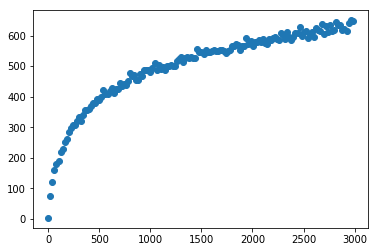

In [175]:
mean_array = [(10, 5, 5), (3, 16, 4), (2, 2, 7), (4,4,9)]
num_samples_per_cluster = 50
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
output_side_length = 20
num_samples_per_cluster_list = []
num_dots_list = []
for num_samples_per_cluster in range(1, 3000, 20):
    z = generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)
    num_samples_per_cluster_list.append(num_samples_per_cluster)
    num_dots_list.append(np.sum(z))

plt.scatter(num_samples_per_cluster_list, num_dots_list)

### How to use in your project!!
In your application, you only need to adjust the value of mean_array. This are the coordinates of the centers of cluster in your image. 
Note, if your image size is 20 above, you would better choose mean_array which has values between 0 and 20.

In [172]:
# example
mean_array = [(10, 5, 5), (3, 16, 4), (2, 2, 7), (4,4,9)]
num_samples_per_cluster = 50
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
output_side_length = 20

z = generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)

### Preview 

In [17]:
z.shape

(20, 20, 20)

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


Axes3D.scatter()